<a href="https://colab.research.google.com/github/juanBIMMUNE/GravityML/blob/master/GravityML_Experiment3_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPERIMENTO 3**

**DESCRIPCIÓN:**

Vamos a realizar un último experimento que nos permitirá entender mejor otros factores que afectan al movimiento vertical. En él, además de desactivar el vacío, desactivaremos el control de temperatura de la cámara, de tal forma que podremos encontrar **diferentes densidades del aire** en diferentes lanzamientos de objetos.

* Solicitamos a nuestros compañeros que ejecuten un set de tests con la **cámara de vacío apagada** y el **control de temperatura apagado**. 

* Todos los objetos se dejarán caer desde la misma altura: **200m**.

* En este experimento **todos los objetos tendrán la misma forma** (mismo coeficiente de drag).

Veamos que sucede...



![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/NASA_logo.svg/200px-NASA_logo.svg.png)




**INSTRUCCIONES:**

* Para completar el reto, debes completar cada una de las tareas abajo indicadas. 
* Sólo debes modificar aquellas líneas donde veas una interrogación (**?**) en el código.
* Antes de empezar, navega a la sección **ANEXOS > GENERADOR DATASET** y ejecuta su celda de código. Esto te permitirá generar durante el reto nuevas observaciones.


## **PREPARA TUS HERRAMIENTAS**

Hemos importado ya las librerías necesarias para ti, ejecuta la siguiente celda para poder utilizarlas.

In [ ]:
#MANIPULACIÓN DE DATOS
import numpy as np
import pandas as pd

#VISUALIZACIÓN
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#ALGORITMOS ML
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split  

## **PREPARA TU DATASET**



Nunca generar nuevas observaciones fue tan fácil, es una de las ventajas de trabajar para la NASA! A continuación generamos un dataset adaptado a las condiciones del experimento.


In [ ]:
#DATASET GENERADO
samples = dataset_generator(vacuum=0, population_size=50, checkpoints=20,temperature_control=0)

## **EXPLORAMOS LOS DATOS**



Vamos a ver qué aspecto tienen los datos recabados

In [ ]:
samples.head(10)

,ID,Z,T,DRAG,AIR_DENSITY,MASS,AREA
0,Object0,168.342554,2.755058,1.05,1.157053,5,0.125
1,Object0,135.203759,3.941556,1.05,1.157053,5,0.125
2,Object0,199.935086,0.124756,1.05,1.157053,5,0.125
3,Object0,183.973773,1.960236,1.05,1.157053,5,0.125
4,Object0,123.200680,4.291128,1.05,1.157053,5,0.125
5,Object0,185.172445,1.885504,1.05,1.157053,5,0.125
6,Object0,132.696169,4.017100,1.05,1.157053,5,0.125
7,Object0,167.604305,2.786997,1.05,1.157053,5,0.125
8,Object0,196.765900,0.880581,1.05,1.157053,5,0.125
9,Object0,184.321800,1.938835,1.05,1.157053,5,0.125


**ID** = identificador del objeto lanzado

**Z** = altura del objeto en un determinado tiempo

**T** = tiempo que ha pasado desde que se ha dejado caer el objeto y se ha 
realizado la medición

**DRAG** = coeficiente de rozamiento del objeto

**AIR_DENSITY** = densidad del aire

**MASS** = masa del objeto

**AREA** = área del objeto (perpendicular al movimiento)

Ponemos foco en la relación altura-tiempo:

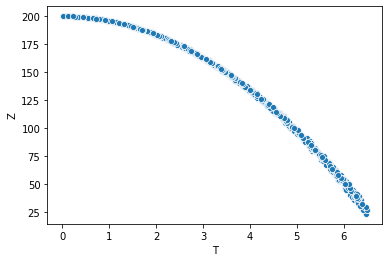

In [ ]:
sns.scatterplot('T','Z',data=samples);

Podemos ver de nuevo que el tiempo por sí solo no parece explicar el comportamiento de los objetos: vemos cierta variación en la curva generada.

## **GENERAMOS EL MODELO**

### **TAREA 1:** GENERA LAS COLUMNAS NECESARIAS PARA ENTRENAR TU MODELO

In [ ]:
# A) COLUMNA T^2 (T AL CUADRADO)
samples['T2'] = ?

# B) COLUMNA T^2 * AIR_DENSITY (T AL CUADRADO POR DENSIDAD DEL AIRE)
samples['T2-AIR_DENSITY'] = ?

### **TAREA 2:** DEFINE Y ENTRENA TU MODELO

In [ ]:
# INICIALIZAMOS UN NUEVO MODELO DE REGRESIÓN
model = LinearRegression()

# DEFINIMOS LAS VARIABLES DE ENTRADA Y SALIDA
X = ? # ENTRADA
y = ? # SALIDA

# ENTRENAMOS EL MODELO
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **TAREA 3:** PON A PRUEBA TU MODELO

In [ ]:
predictions = ?
plt.scatter(samples[['T']],y)
plt.scatter(samples[['T']],predictions);

Deberías ver cómo las predicciones y las observaciones originales quedan solapadas en el gráfico al adaptarse el modelo perfectamente al fenómeno estudiado.

Otro punto de vista (3 dimensiones):

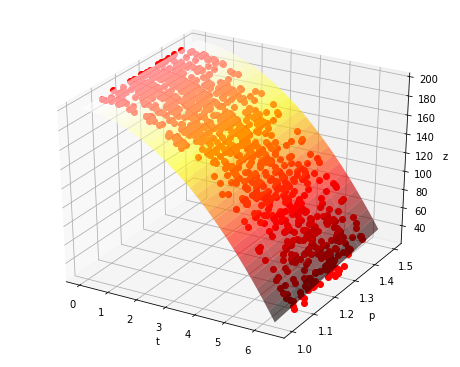

In [ ]:
# 3D Plotting
fig = plt.figure(figsize=[8, 6.5])
ax = fig.gca(projection='3d')

t_surf=np.arange(0, 6.5, 0.1)                # generate mesh
d_surf=np.arange(1, 1.55, 0.1)
t_surf, d_surf = np.meshgrid(t_surf, d_surf)

z_surf = model.intercept_ + model.coef_[0]*t_surf + model.coef_[1]*t_surf**2 + model.coef_[2]*t_surf**2*d_surf
ax.plot_surface(t_surf, d_surf, z_surf, cmap=cm.hot, alpha=0.6);
ax.set_xlabel('t')
ax.set_ylabel('p')
ax.set_zlabel('z')
ax.plot(samples['T'],samples['AIR_DENSITY'],samples['Z'],'ro');

## **ANEXOS**


### **GENERADOR DATASET**

Esta funcionalidad nos pemitirá generar nuevos datasets bajo demanda.

In [ ]:
import numpy as np
import pandas as pd

#CONSTANTS
Z_0 = 200 #posición cuando t=0 -> siempre dejamos caer los objetos desde esta altura
V_0 = 0 #velocidad cuando t=0 -> los objetos parten a velocidad cero
GRAVITY = -9.8 #m/s2
AIR_DENSITY_VACUUM_ON = 0 #kg/m3
AIR_DENSITY_VACUUM_OFF = 1.2041 #kg/m3
MASS = 5 #kg
DRAG_COEFFICIENT = 1.05 #cube coefficient
AREA = 0.125 #m2
np.random.seed(0)
default_population_size = 50 #cantidad de objetos lanzados
default_checkpoints = 10 #cantidad de puntos de control durante la caída


#F(X) REAL DEL MOVIMIENTO VERTICAL
def object_vertical_location(air_density,drag_coeff,t):
  return Z_0 + t*V_0 + t**2*GRAVITY/2 + t**2*(air_density*AREA*drag_coeff*GRAVITY**2/(2*MASS))/2


#GENERADOR DATASET
def dataset_generator(vacuum=1, population_size=default_population_size, checkpoints=default_checkpoints,temperature_control=1):
  #Initialize dataset
  dataset = pd.DataFrame(columns=['ID','Z','T','DRAG'])  
  
  #Generamos un coefficiente de rozamiento para cada objeto
  drag_coeffs = np.random.normal(DRAG_COEFFICIENT_AVG, 0.34, population_size)

  #Generamos una densidad del aire para cada objeto (densidad cuando se llevó a cabo el lanzamiento)
  air_densities = np.random.normal(1.2466, 0.10, population_size)

    
  #Vertical locations
  if vacuum == 1: # Con vacío
    for i in range(0,population_size): #Para cada objeto calculamos su altura en cada checkpoint
      t = np.random.uniform( low=0,high=6.5,size=checkpoints)
      dataset = dataset.append(pd.DataFrame(
          { "ID": np.full((checkpoints,), i, dtype=int),
            "Z": object_vertical_location(AIR_DENSITY_VACUUM_ON,drag_coeffs[i],t), 
            "T":t,
            "AIR_DENSITY":np.full((checkpoints,), air_densities[i])
            }
          )
      )
  else: # Sin vacío
    if temperature_control==1: #Temperatura constante, densidad del aire no cambia
      for i in range(0,population_size): #Para cada objeto calculamos su altura en cada checkpoint
        t = np.random.uniform( low=0,high=6.5,size=checkpoints)
        dataset = dataset.append(pd.DataFrame(
            { "ID": np.full((checkpoints,), i, dtype=int),
              "Z": object_vertical_location(AIR_DENSITY_VACUUM_OFF,DRAG_COEFFICIENT,t), 
              "T":t,
              "AIR_DENSITY":np.full((checkpoints,), air_densities[i])
              }
            )
        )
    else:
      for i in range(0,population_size): #Para cada objeto calculamos su altura en cada checkpoint
        t = np.random.uniform( low=0,high=6.5,size=checkpoints)
        dataset = dataset.append(pd.DataFrame(
            { "ID": np.full((checkpoints,), i, dtype=int),
              "Z": object_vertical_location(air_densities[i],DRAG_COEFFICIENT,t), 
              "T":t,
              "AIR_DENSITY":np.full((checkpoints,), air_densities[i])
              }
            )
        )
  dataset['ID'] = 'Object' + dataset['ID'].astype(str)
  dataset['DRAG'] = DRAG_COEFFICIENT
  dataset['MASS'] = MASS
  dataset['AREA'] = AREA
  return dataset


\* La ecuación física utilizada para construir este generador de datasets no sigue la ecuación física real, sino que se ha utilizado una ecuación simplificada con fines educativos.